# Лабораторная работа 3
# Многослойные сети. Алгоритм обратного распространения ошибки

### Воронов К.М., М8О-407Б-19

Цель работы: исследование свойств многослойной нейронной сети прямого распространения и алгоритмов ее обучения, применение сети в задачах классификации и аппроксимации функции

Вариант 19

In [1]:
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Классификация

In [ ]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

# Уравнение параболы в параметрическом виде.
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y

# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

In [ ]:
# Эллипс
a1 = 0.4 
b1 = 0.4
alpha1 = 0
x01 = 0.1
y01 = -0.15

# Эллипс
a2 = 0.7
b2 = 0.7
alpha2 = 0
x02 = 0
y02 = 0

# Парабола
p = -1
alpha3 = 0
x03 = 0.8
y03 = 0

In [ ]:
t = np.arange(0, 2 * np.pi, 0.025)

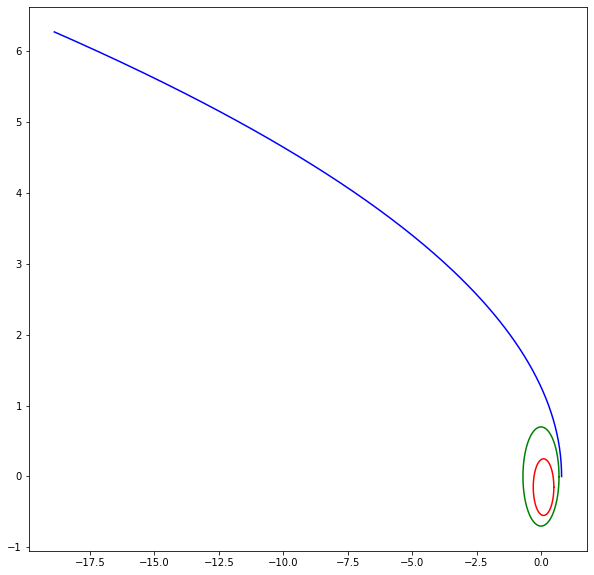

In [ ]:
fig1x, fig1y = ellipse(t, a1, b1, x01, y01)
fig1x, fig1y = rotate(fig1x, fig1y, alpha1)

fig2x, fig2y = ellipse(t, a2, b2, x02, y02)
fig2x, fig2y = rotate(fig2x, fig2y, alpha2)

fig3x, fig3y = parabola(t, p, x03, y03)

fig3x, fig3y = rotate(fig3x, fig3y, alpha3)

figure = plt.figure(figsize = (10, 10))

plt.plot(fig1x, fig1y, c = 'r')
plt.plot(fig2x, fig2y, c = 'g')
plt.plot(fig3x, fig3y, c = 'b')
plt.show()

In [ ]:
datax = np.concatenate((fig1x, fig2x, fig3x), axis=0)
datay = np.concatenate((fig1y, fig2y, fig3y), axis=0)


data = np.array([datax, datay])

l1 = [[1, 0, 0] for _ in range(len(fig1x))]
l2 = [[0, 1, 0] for _ in range(len(fig2x))]
l3 = [[0, 0, 1] for _ in range(len(fig3x))]

labels = np.array(l1 + l2 + l3)

data = data.transpose()

(756,)


In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 10,shuffle = True)

In [ ]:
model = keras.models.Sequential()

model.add(Dense(10, input_dim = 2, activation = "tanh",  kernel_initializer = keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.add(Dense(20, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(3, activation = "sigmoid"))

model.compile(tf.keras.optimizers.SGD(0.05), 'mse')

hist = model.fit(train, train_labels, batch_size = 1, epochs = 100)

Epoch 1/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1601
Epoch 2/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1370
Epoch 3/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1319
Epoch 4/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1282
Epoch 5/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1261
Epoch 6/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1233
Epoch 7/100
604/604 [==============================] - 2s 3ms/step - loss: 0.1208
Epoch 8/100
604/604 [==============================] - 2s 4ms/step - loss: 0.1193
Epoch 9/100
604/604 [==============================] - 2s 4ms/step - loss: 0.1172
Epoch 10/100
604/604 [==============================] - 2s 4ms/step - loss: 0.1159
Epoch 11/100
604/604 [==============================] - 2s 4ms/step - loss: 0.1139
Epoch 12/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1121
Epoch 13/100


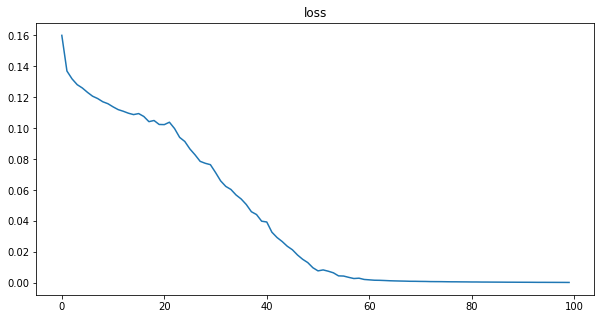

In [ ]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

1250/1250 [==============================] - 2s 1ms/step


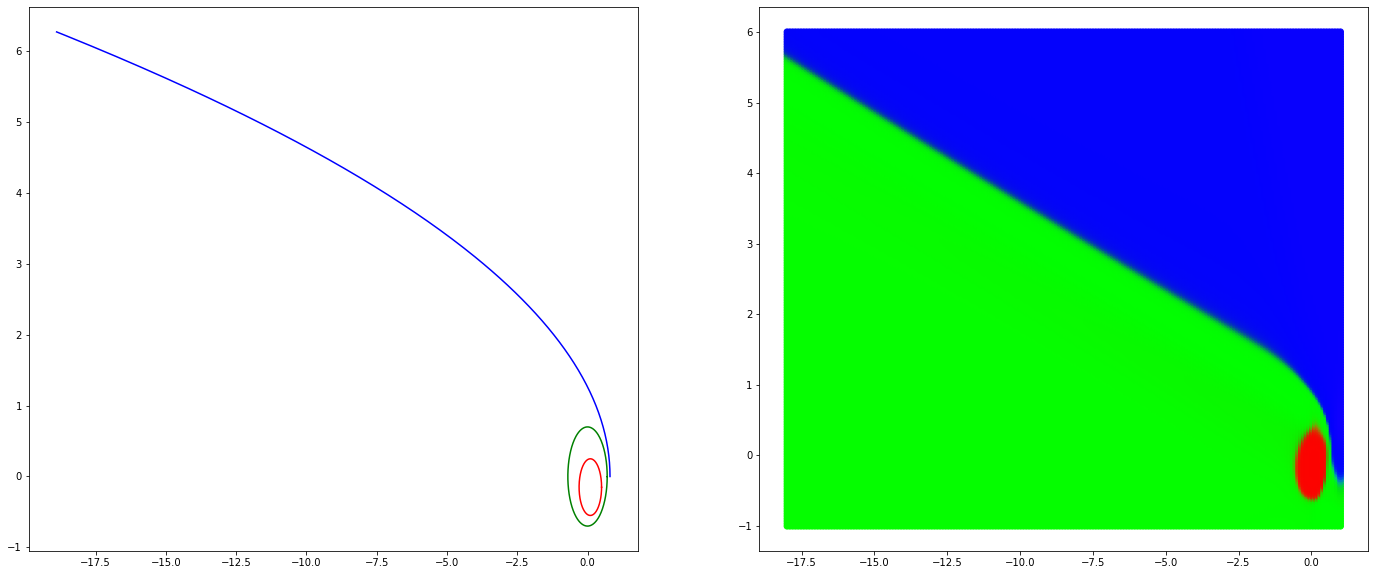

In [ ]:
import itertools

x = np.linspace(-18, 1, 200)
y = np.linspace(-1, 6, 200)

figure = plt.figure(figsize = (24, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.plot(fig1x, fig1y, c = 'r')
ax1.plot(fig2x, fig2y, c = 'g')
ax1.plot(fig3x, fig3y, c = 'b')

data = np.array(list(itertools.product(x, y)))

xy = data.transpose()

pred = model.predict(data)


ax2.scatter(xy[0], xy[1], c = pred)

plt.show()

## Аппроксимация

In [ ]:
def f(t):
    return np.sin(-5 * t * t + 10 * t - 5)

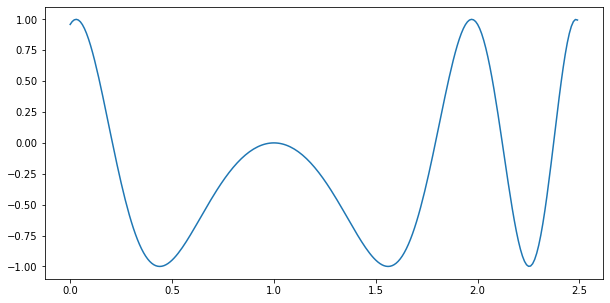

In [ ]:
t = np.arange(0, 2.5, 0.01)
ft = f(t)


figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft)
plt.show()

In [ ]:
model = keras.models.Sequential()

model.add(Dense(20, input_dim = 1, activation = "tanh",  kernel_initializer = keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.add(Dense(80, activation = "tanh"))
model.add(Dense(40, activation = "tanh"))
model.add(Dense(1, activation = "linear"))

model.compile(tf.keras.optimizers.SGD(0.01), 'mse')

hist = model.fit(t, ft, batch_size = 1, epochs = 800, shuffle = True)

Epoch 1/800
250/250 [==============================] - 1s 2ms/step - loss: 0.4234
Epoch 2/800
250/250 [==============================] - 1s 2ms/step - loss: 0.4099
Epoch 3/800
250/250 [==============================] - 1s 2ms/step - loss: 0.4042
Epoch 4/800
250/250 [==============================] - 0s 2ms/step - loss: 0.4015
Epoch 5/800
250/250 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 6/800
250/250 [==============================] - 1s 2ms/step - loss: 0.3901
Epoch 7/800
250/250 [==============================] - 0s 2ms/step - loss: 0.3948
Epoch 8/800
250/250 [==============================] - 1s 2ms/step - loss: 0.4010
Epoch 9/800
250/250 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 10/800
250/250 [==============================] - 0s 2ms/step - loss: 0.3958
Epoch 11/800
250/250 [==============================] - 1s 2ms/step - loss: 0.3806
Epoch 12/800
250/250 [==============================] - 0s 2ms/step - loss: 0.3962
Epoch 13/800


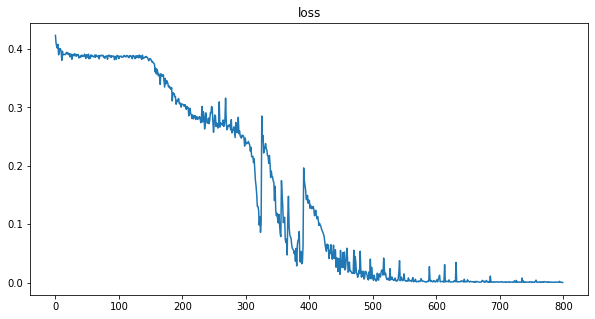

In [ ]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

16/16 [==============================] - 0s 1ms/step


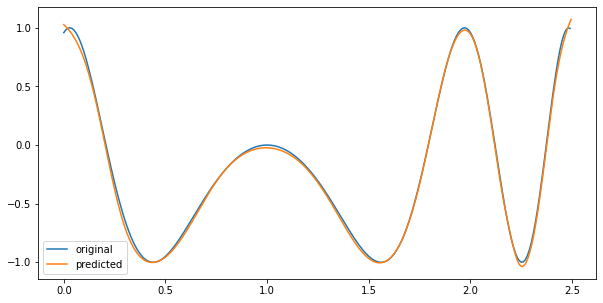

In [ ]:
t2 = np.arange(0, 2.5, 0.005)

pred = model.predict(t2)

figure = plt.figure(figsize = (10, 5))

plt.plot(t, ft, label = 'original')
plt.plot(t2, pred, label = 'predicted')
plt.legend()
plt.show()

# Выводы
Выполнив данную лабораторную работу, я вспомнил, как устроены многослойные сети и реализовал несколько из них, решив задачи аппроксимации и фильтрации.